In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = 'trainable_both_small_beta'
exp = filename + '.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue

#dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
#df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') 
#df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') 
df.dtypes

nodes             int64
epochs            int64
train-mse       float64
majority-mse    float64
minority-mse    float64
dtype: object

In [2]:
measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['nodes', 'epochs'], as_index=False).agg(agg_dict)
result

nodes epochs train-mse                 majority-mse                  \
                       mean       std count         mean       std count   
0        1     20  0.727290  0.225643  1000     0.752899  0.221783  1000   
1        1     40  0.529772  0.262700  1000     0.549390  0.271204  1000   
2        1    100  0.199910  0.162565  1000     0.201508  0.178533  1000   
3        1    500  0.043875  0.046460  1000     0.032578  0.045256  1000   
4        1   1000  0.038394  0.008012  1000     0.027092  0.003895  1000   
..     ...    ...       ...       ...   ...          ...       ...   ...   
97   65536     40  0.042985  0.005221  1000     0.039710  0.002634  1000   
98   65536    100  0.037892  0.004074  1000     0.040522  0.003100  1000   
99   65536    500  0.027957  0.002044  1000     0.042753  0.004410  1000   
100  65536   1000  0.023474  0.001385  1000     0.042337  0.004957  1000   
101  65536   2000  0.019086  0.001109  1000     0.040653  0.005538  1000   

    minority-mse                  
            mean       std count  
0       0.835456  0.176812  1000  
1       0.702158  0.201894  1000  
2       0.481477  0.128469  1000  
3       0.382409  0.037485  1000  
4       0.382619  0.024384  1000  
..           ...       ...   ...  
97      0.391170  0.024283  1000  
98      0.395171  0.024306  1000  
99      0.399048  0.024425  1000  
100     0.398299  0.024441  1000  
101     0.395811  0.024527  1000  

[102 rows x 11 columns]

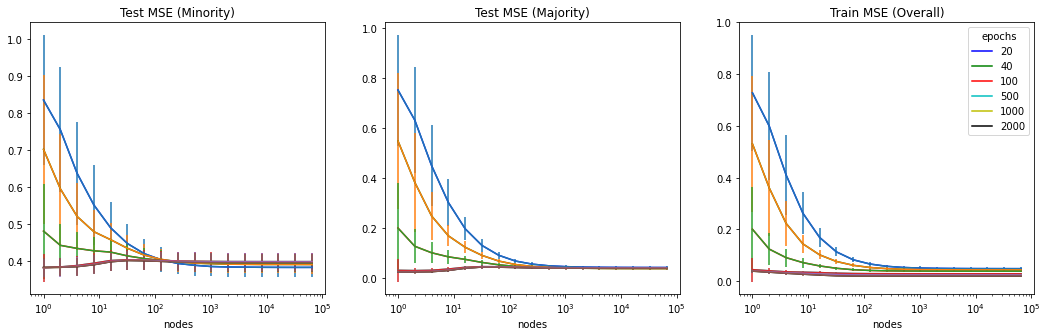

In [3]:
epochs_list = np.unique(df['epochs'])
color_list = 'bgrcyk'

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
for epochs, color in zip(epochs_list, color_list):
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    ax[0].plot(nodes, mean, color)
    ax[0].errorbar(nodes, mean, std)
    #ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].set_title('Test MSE (Minority)')
    ax[0].set_xlabel('nodes')


    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    ax[1].plot(nodes, mean, color)
    ax[1].errorbar(nodes, mean, std)
    #ax[0].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_title('Test MSE (Majority)')
    ax[1].set_xlabel('nodes')

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    ax[2].plot(nodes, mean, color)
    ax[2].errorbar(nodes, mean, std)
    #ax[0].set_yscale('log')
    ax[2].set_xscale('log')
    ax[2].set_title('Train MSE (Overall)')
    ax[2].set_xlabel('nodes')


plt.legend(epochs_list, title='epochs')
plt.savefig(filename + '.pdf')

In [4]:
epochs_list = np.unique(df['epochs'])
color_list=['red', 'green', 'blue', 'black', 'purple', 'orange']

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
fig = make_subplots(rows = 1, cols=3, subplot_titles=['Test MSE (minority)', 'Test MSE (majority)', 'Train MSE (overall)'])
for epochs, color in zip(epochs_list, color_list):
    line = go.scatter.Line(color = color)
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    error_y = dict(type = 'data', array = std, color = color, width = 0, thickness = 0.9)
    marker = dict(size = 3)
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker, name = str(epochs),\
         legendgroup = str(epochs), showlegend = False), row = 1, col = 1)

    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line,  error_y = error_y, marker = marker, name = str(epochs),\
        legendgroup = str(epochs), showlegend = False), row = 1, col = 2)

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker,  name = str(epochs),\
        legendgroup = str(epochs), showlegend = True), row = 1, col = 3)


fig.update_xaxes(type = 'log', title = 'nodes')
fig.update_layout(height = 400, width = 1000, legend_title_text='epochs')

fig.show()
plotly.offline.plot(fig, filename = filename + '.html')

'trainable_both_small_beta.html'